In [1]:
from utils import *
import matplotlib

matplotlib.rcParams["figure.dpi"] = 600

In [2]:
inputs = np.array(
    [50, 60, 70, 80, 90, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1500]
)  # input values in mV
# inputs = np.array([50, 100])
results: list[FitInfo] = getFits((1, 16))  # file range 1->16
capacitance = 1e-12  # capacitance of test capacitor
inputs = inputs * 1e-3 * capacitance * 1e12  # convert mV into charge (C)

In [3]:
print(results)

[FitInfo(
mu: 7.415e-08 +- 6e-11
std: 5.205e-08 +- 6e-11
A: 0.1968 +- 0.0002
c: 0.0121 +- 2e-05
), FitInfo(
mu: 7.782e-08 +- 5e-11
std: 5.143e-08 +- 5e-11
A: 0.2392 +- 0.0002
c: 0.01221 +- 2e-05
), FitInfo(
mu: 8.082e-08 +- 5e-11
std: 5.153e-08 +- 5e-11
A: 0.2768 +- 0.0002
c: 0.01225 +- 3e-05
), FitInfo(
mu: 8.275e-08 +- 5e-11
std: 5.161e-08 +- 5e-11
A: 0.3145 +- 0.0003
c: 0.01246 +- 3e-05
), FitInfo(
mu: 8.473e-08 +- 5e-11
std: 5.163e-08 +- 5e-11
A: 0.3554 +- 0.0003
c: 0.01689 +- 3e-05
), FitInfo(
mu: 8.694e-08 +- 5e-11
std: 5.16e-08 +- 5e-11
A: 0.3958 +- 0.0003
c: 0.01694 +- 4e-05
), FitInfo(
mu: 7.915e-08 +- 6e-11
std: 5.132e-08 +- 6e-11
A: 0.7887 +- 0.0008
c: 0.2175 +- 0.0001
), FitInfo(
mu: 8.651e-08 +- 5e-11
std: 5.132e-08 +- 6e-11
A: 1.174 +- 0.001
c: 0.2202 +- 0.0001
), FitInfo(
mu: 8.033e-08 +- 5e-11
std: 5.144e-08 +- 5e-11
A: 1.565 +- 0.001
c: 0.08637 +- 0.0002
), FitInfo(
mu: 8.351e-08 +- 5e-11
std: 5.161e-08 +- 5e-11
A: 1.951 +- 0.002
c: 0.08576 +- 0.0002
), FitInfo(
mu: 8.


Shaper 1 Calibration
Gain 1 & 2 off, Preamp 1
3.85 +- 0.02 V/pC



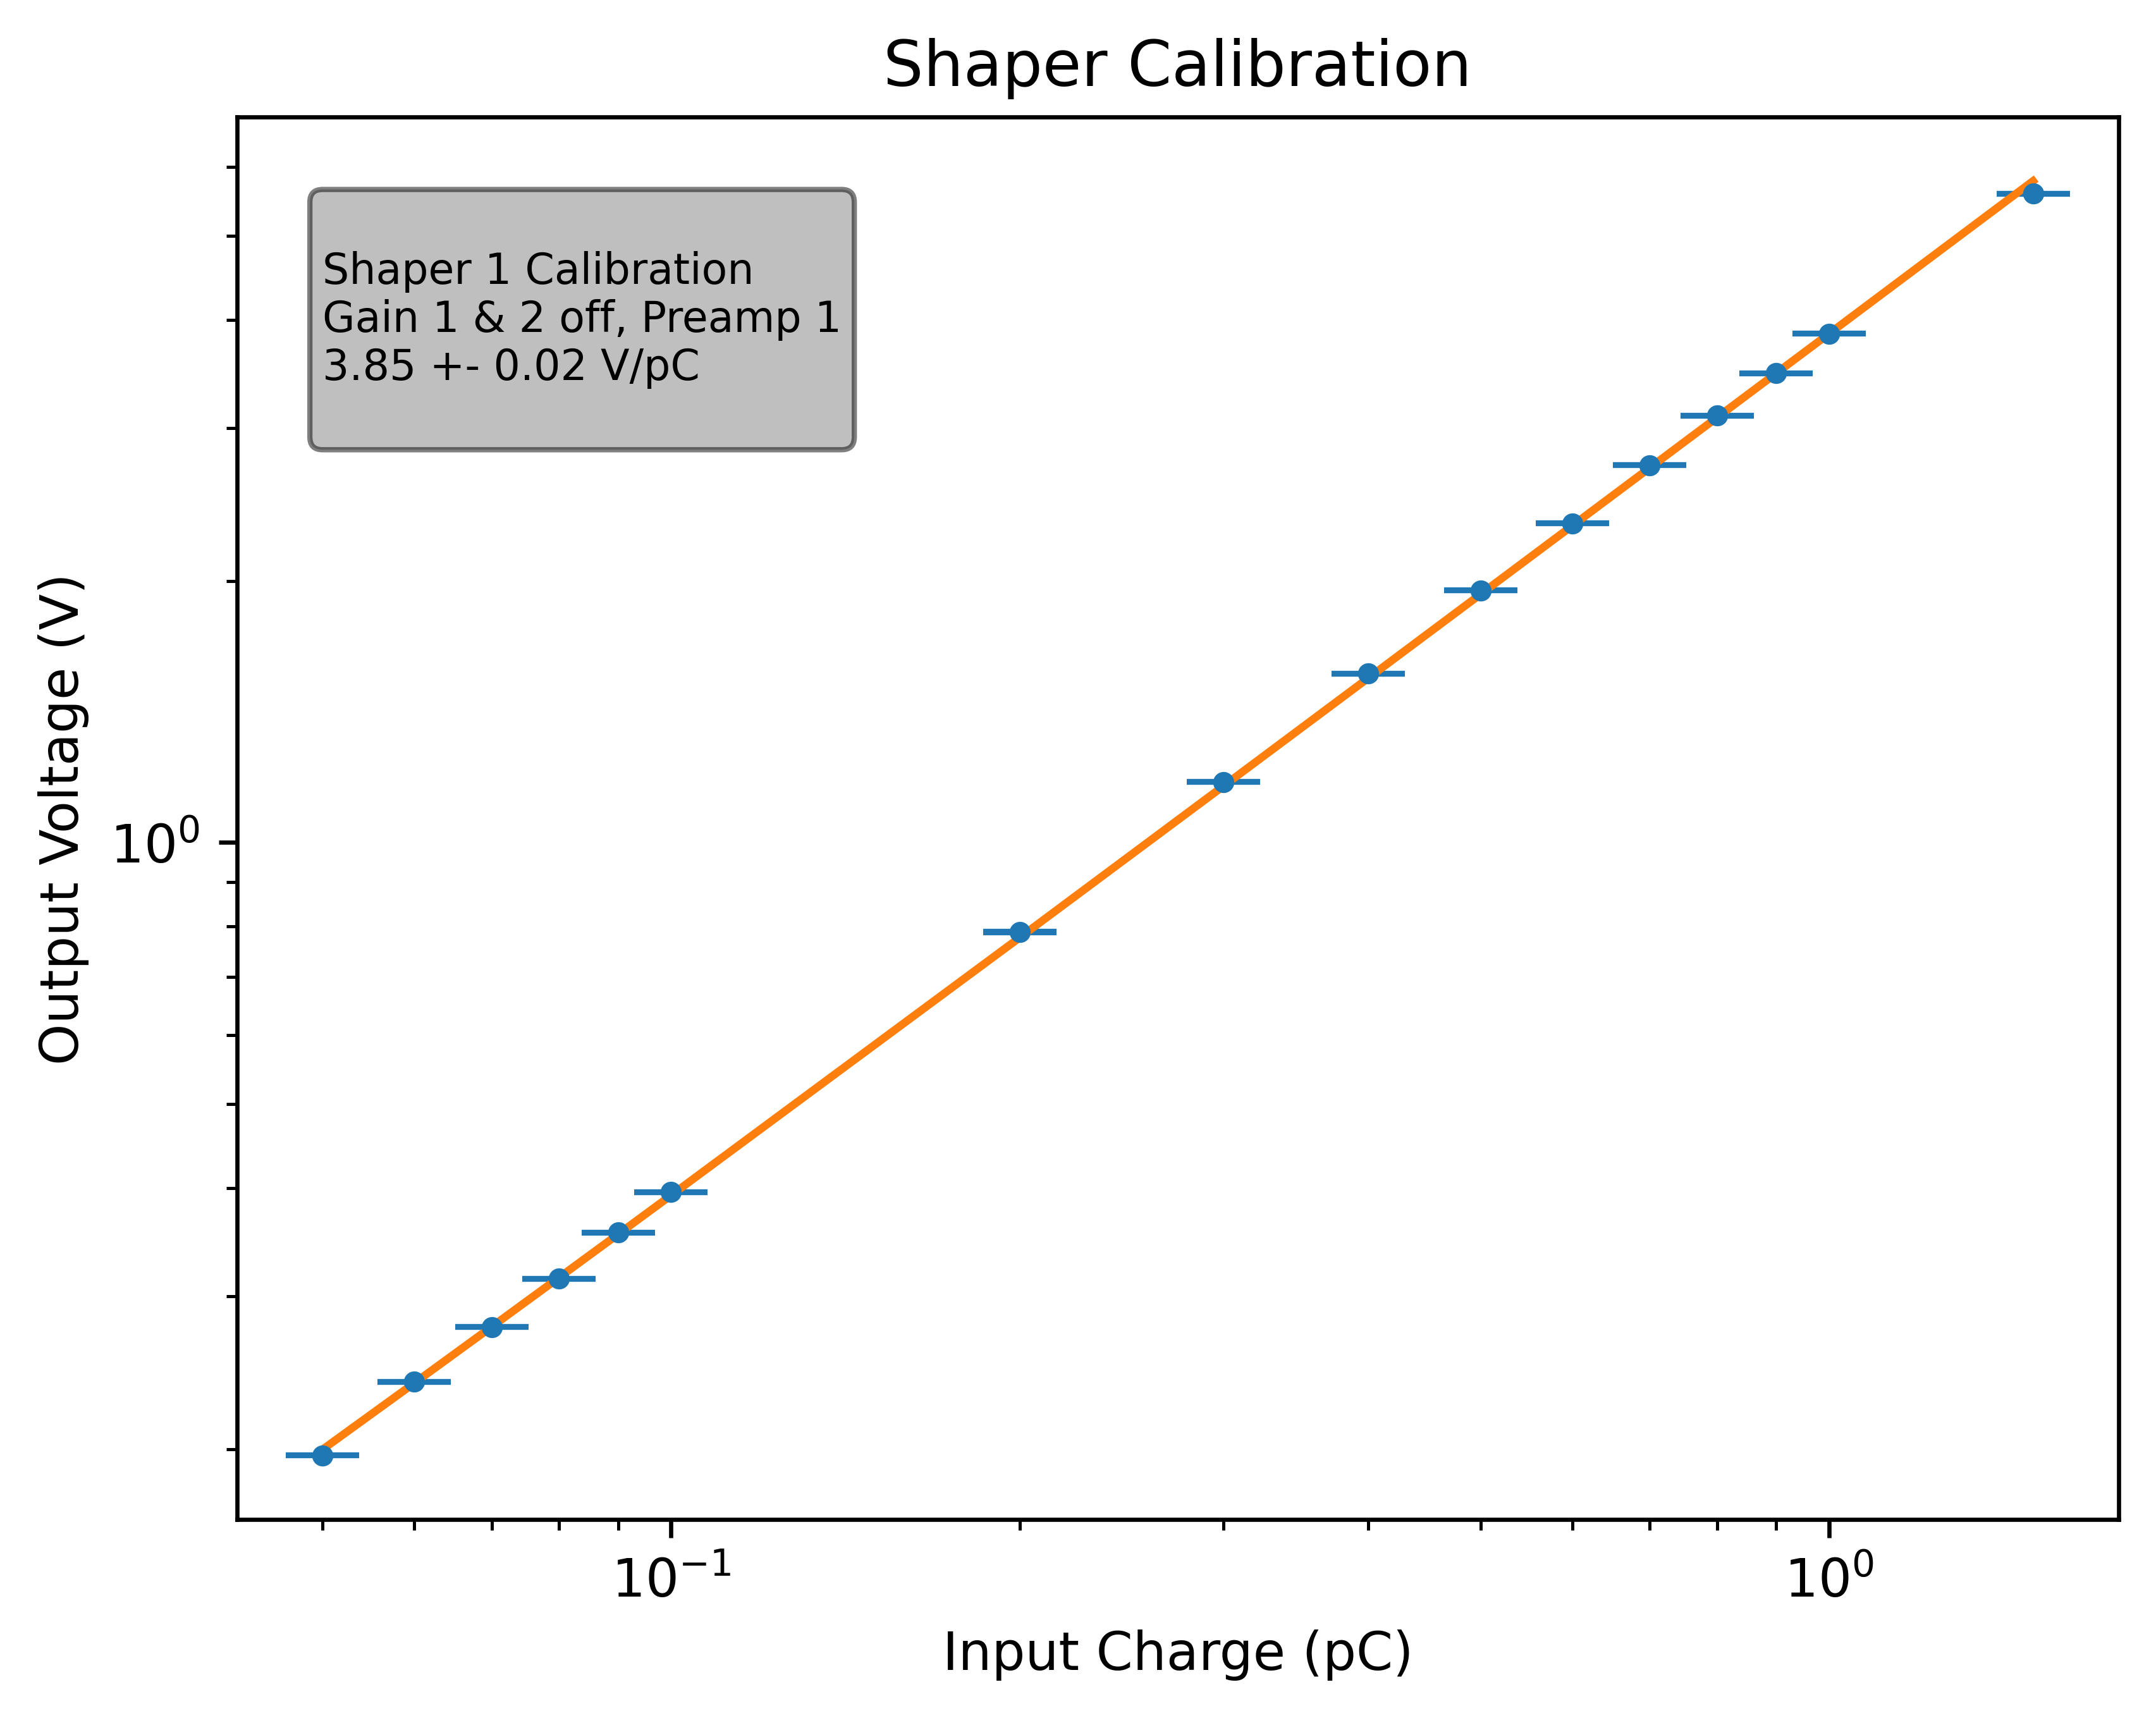

In [14]:
amps = getAmps(results)  # get amplitude values from results
amps, amps_std = np.transpose(amps)

plt.loglog()
plt.errorbar(inputs, amps, amps_std, capsize=7, fmt=".")
plt.xlabel("Input Charge (pC)")
plt.ylabel("Output Voltage (V)")
plt.title("Shaper Calibration")

linear = lambda x, m, b: m * x + b
p, cov = curve_fit(linear, inputs, amps, sigma=amps_std, p0=(3753861894698.39, 0))
linerr = np.sqrt(np.diag(cov))
plt.plot(inputs, linear(inputs, *p))
props = dict(boxstyle="round", facecolor="grey", alpha=0.5)
textstr = f"""
Shaper 1 Calibration\nGain 1 & 2 off, Preamp 1
{p[0]:.3g} +- { linerr[0]:.1g} V/pC
"""
plt.text(0.05, 3, textstr, fontsize=8, bbox=props)
print(textstr)
plt.savefig("./final_fit.png")
plt.show()

In [13]:
gain_on = getSlope(np.asarray([50, 100]), (17, 18))
print(f"{gain_on[0]/p[0] : .3g}")  # gain due to one switch being on. Approximate.

 9.94
